In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


all_conditions = {
    "Minus": "lightcoral", 
    "Plus":  "red",
}

all_replicates = ["1", "2", "3"]

all_dots = ["with dots","without dots"]

filename_format = "5357-{0}-{1}-Projection-{2}.csv"

area_df = pd.DataFrame(index=all_conditions,columns=all_dots)
int_df = pd.DataFrame(index=all_conditions,columns=all_dots)

def append_array( df, row, col, arr ):
    if isinstance(df.loc[row,col], np.ndarray):
        df.at[row,col] = np.concatenate([df.at[row,col], arr])
    else:
        df.at[row,col] = arr


for condition in all_conditions.keys():
    for replicate in all_replicates:
        for dot in all_dots:
        
            filename = filename_format.format(condition,replicate,dot)
            df = pd.read_csv(filename, skiprows = 11).drop(0)

            append_array( area_df, condition, dot, np.array(df["Area"], dtype=float) )
            append_array( int_df, condition, dot, np.array(df["Integration"], dtype=float) )

In [2]:
int_dot = int_df["with dots"] - int_df["without dots"]
area_dot = area_df["with dots"] - area_df["without dots"]
avg_dot = int_dot / area_dot

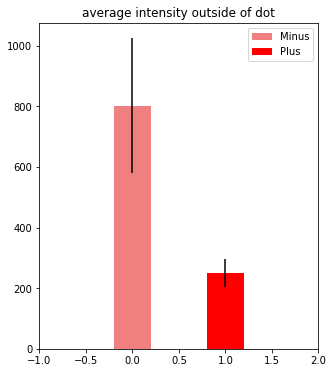

In [3]:
plt.figure(figsize=(5,6))
for x,condition in enumerate(all_conditions.keys()):
    values = int_df.loc[condition,"without dots"]/area_df.loc[condition,"without dots"]
    color = all_conditions[condition]
    plt.bar( x, values.mean(), yerr=values.std(), label=condition, color=color, width=.4 )
plt.legend()
plt.title("average intensity outside of dot")

plt.xlim(-1,2)

plt.show()

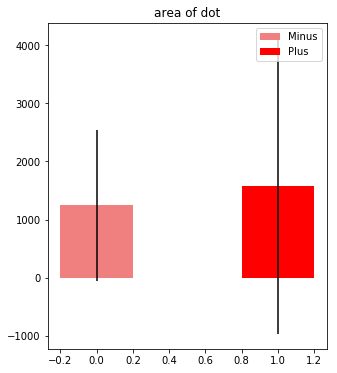

In [4]:
plt.figure(figsize=(5,6))
for x,condition in enumerate(all_conditions.keys()):
    values = area_dot[x]
    color = all_conditions[condition]
    plt.bar( x, values.mean(), yerr=values.std(), label=condition, color=color, width=.4 )
plt.legend()
plt.title( "area of dot")
plt.show()